<center><h1>EE 559 HW1</h1></center>
<center><h1>Vertebral Column Data Set</h1></center>
<center><h1>Ruiwen HE SID:1764688104</h1></center>

This Biomedical data set was built by Dr. Henrique da Mota during a medical residence period in Lyon, France. Each patient in the data set is represented in the data set by six biomechanical attributes derived from the shape and orientation of the pelvis and lumbar spine (in this order): pelvic incidence, pelvic tilt, lumbar lordosis angle, sacral slope, pelvic radius and grade of spondylolisthesis. The following convention is used for the class labels: DH (Disk Hernia), Spondylolisthesis (SL), Normal (NO) and Abnormal (AB). In this exercise, we only focus on a binary classification task NO=0 and AB=1.

### (a) Download the Vertebral Column Data Set from:
https://archive.ics.uci.edu/ml/datasets/Vertebral+Column.

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestNeighbors

In [11]:
# columns name: pelvic incidence, pelvic tilt, lumbar lordosis angle, 
# sacral slope, pelvic radius and grade of spondylolisthesis
vertebral = pd.read_table("column_2C.dat",sep=' ', header=None, names = ['PI','PT','LLA','SS','PR','GOS','class'])
print('before processing', end="\n\n")
print(vertebral.head())

before processing

      PI     PT    LLA     SS      PR    GOS class
0  63.03  22.55  39.61  40.48   98.67  -0.25    AB
1  39.06  10.06  25.02  29.00  114.41   4.56    AB
2  68.83  22.22  50.09  46.61  105.99  -3.53    AB
3  69.30  24.65  44.31  44.64  101.87  11.21    AB
4  49.71   9.65  28.32  40.06  108.17   7.92    AB


/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: read_table is deprecated, use read_csv instead.
  This is separate from the ipykernel package so we can avoid doing imports until


### (b) Pre-Processing and Exploratory data analysis:

In [12]:
vertebral.loc[(vertebral['class'] == 'AB'),['class']] = 1
vertebral.loc[(vertebral['class'] == 'NO'),['class']] = 0
print('after processing', end="\n\n")
print(vertebral.head())

after processing

      PI     PT    LLA     SS      PR    GOS  class
0  63.03  22.55  39.61  40.48   98.67  -0.25      1
1  39.06  10.06  25.02  29.00  114.41   4.56      1
2  68.83  22.22  50.09  46.61  105.99  -3.53      1
3  69.30  24.65  44.31  44.64  101.87  11.21      1
4  49.71   9.65  28.32  40.06  108.17   7.92      1


In [13]:
# vertebral.columns.values
# groups = vertebral.groupby(['class'])

In [14]:
# for key,value in groups:  groupby is iterable, each item is a dictionary,
#     print(type(value))                         key is label, value is the dataframe by each label

#### i.	Make scatterplots of the independent variables in the dataset. Use color to show Classes 0 and 1.

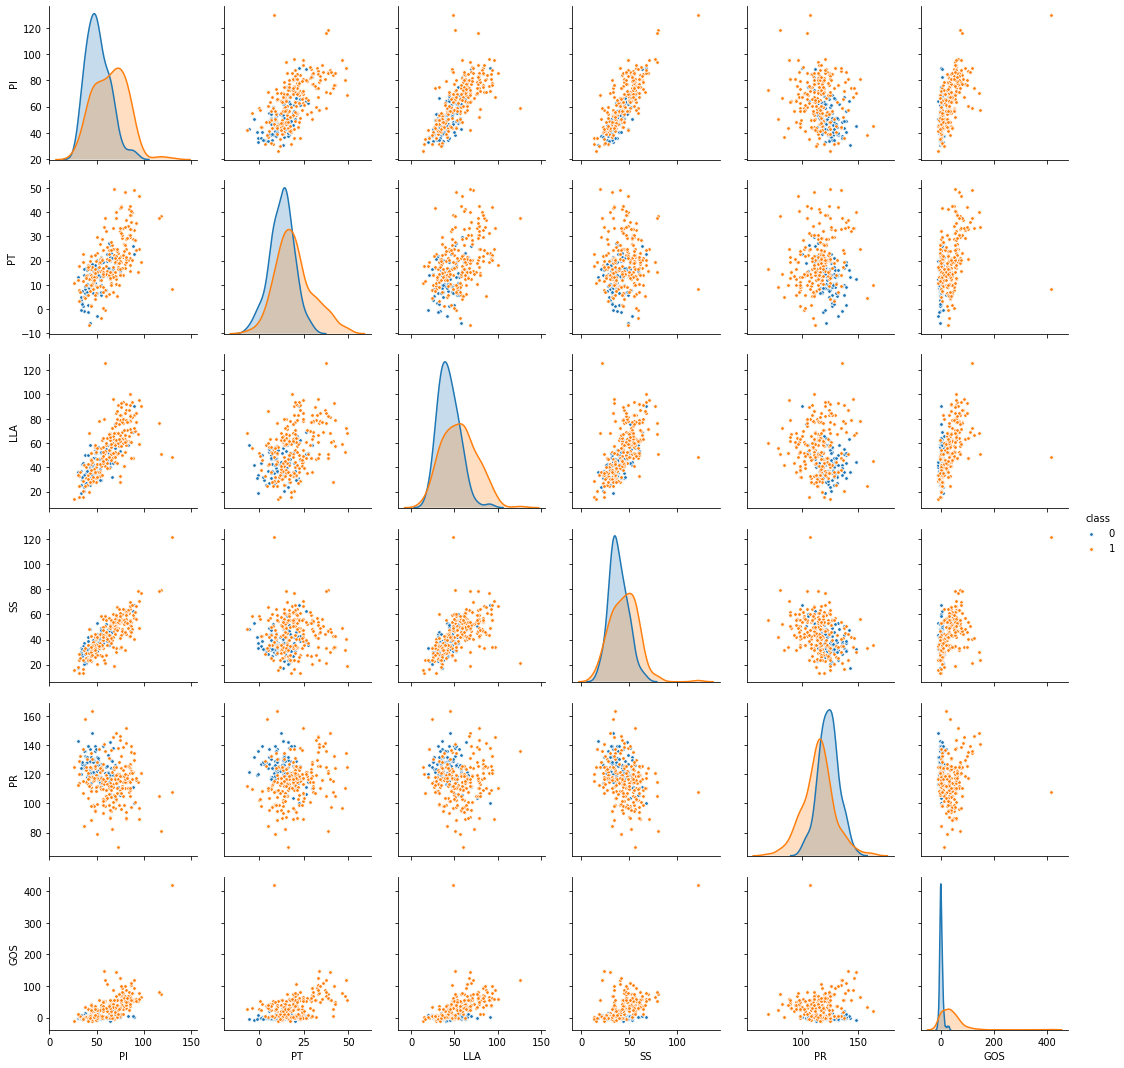

In [15]:
sns.pairplot(vertebral, vars=vertebral.columns[:-1], hue="class", plot_kws={'alpha': 1, 's':13})

In [16]:
# sns.boxplot(data = vertebral)

#### ii. Make boxplots for each of the independent variables. Use color to show Classes 0 and 1 (see ISLR p. 129).

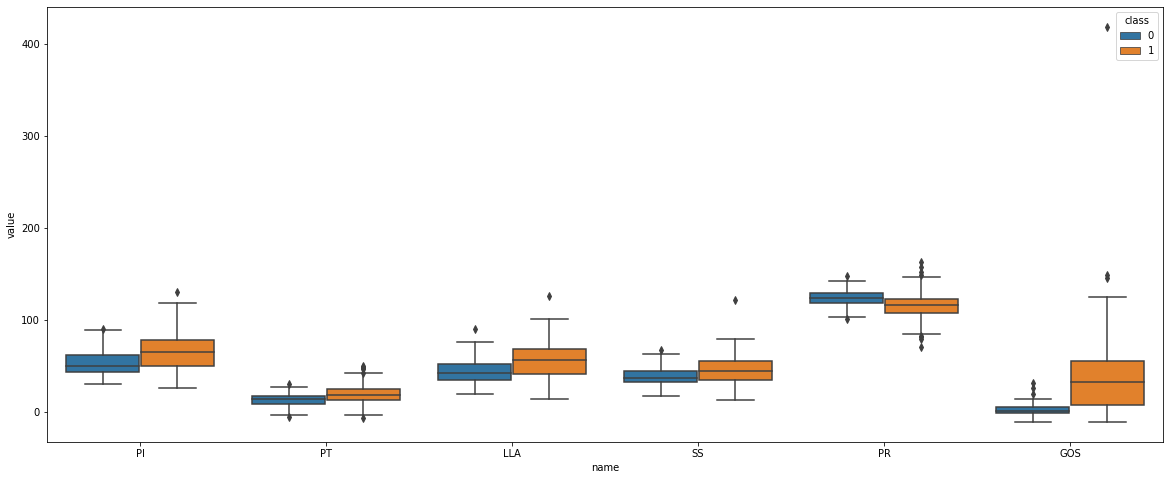

In [17]:
# groups = vertebral.groupby(['class'])
# groups.boxplot(subplots=False,figsize=(20,10))
df_long = pd.melt(vertebral, 'class', var_name="name", value_name="value")
plt.figure(figsize=(20,8))
sns.boxplot(x="name", hue="class", y="value", data=df_long)

#### iii. Select the ﬁrst 70 rows of Class 0 and the ﬁrst 140 rows of Class 1 as the training set and the rest of the data as the test set.

In [18]:
train_set = vertebral.loc[vertebral['class']==1].iloc[:140].append(vertebral.loc[vertebral['class']==0].iloc[:70])
test_set = vertebral.loc[vertebral['class']==1].iloc[140:].append(vertebral.loc[vertebral['class']==0].iloc[70:])
train_set_x = train_set.drop(labels = 'class',axis = 1)
train_set_y = train_set['class']
test_set_x = test_set.drop(labels = 'class',axis = 1)
test_set_y = test_set['class']

In [19]:
print("confirm the size")
print("train: " + str(train_set.shape))
print("test: " + str(test_set.shape))

confirm the size
train: (210, 7)
test: (100, 7)


### (c) Classiﬁcation using KNN on Vertebral Column Data Set

#### i.	Write code for k-nearest neighbors with Euclidean metric (or use a software package).

In [20]:
# k nearest neighbor

def knneighbor(k,X,y,power=2,metric_para='minkowski',weight_para='uniform'):
    if metric_para == 'mahalanobis':
        neigh = KNeighborsClassifier(n_neighbors=k,weights = weight_para,
                                     p=power,metric = metric_para, metric_params={'V':np.cov(X, rowvar=False)})
    else:
        neigh = KNeighborsClassifier(n_neighbors=k,weights = weight_para, p=power,metric = metric_para)
    neigh.fit(X, y)
    return neigh


In [21]:
# finding testing and training error for different k nearest means values
def find_error(k_value, train_set_x, train_set_y,test_set_x,test_set_y,
               power=2,metric_para='minkowski',weight_para='uniform'):
    train_error = []
    test_error = []
    for i in k_value:
        neighbor = knneighbor(i,train_set_x,train_set_y,power,metric_para,weight_para)
        train_error.append(1-neighbor.score(train_set_x,train_set_y))
        test_error.append(1-neighbor.score(test_set_x,test_set_y))
    return {'train_error' : train_error, 'test_error' : test_error}

In [22]:
# plot testing and training error versus different k nearest means values
def plot_error(k_value,test_error,train_error,title = ''):
    plt.figure(figsize=(10,8))
    plt.plot(k_value,train_error,'bo',label='train error')
    plt.plot(k_value,test_error,'ro',label='test error')
    plt.annotate('lowest error point for test data is ({},{:1.2f})'.format(k_value[np.argmin(test_error)],np.min(test_error)),xy=(k_value[np.argmin(test_error)],np.min(test_error)),xytext=(21,0.04),arrowprops=dict(facecolor='black', shrink=0.1),size=15)
    plt.legend()
    plt.xticks(np.arange(1,211,10))
    plt.yticks(np.arange(0,0.4,0.02))
    plt.grid(b="True")
    plt.xlabel('value of k as nearest neighbor',fontsize=25)
    plt.ylabel('error rate',fontsize=25, rotation = 'horizontal',horizontalalignment='right')
    plt.title("test and test error versus k "+title,fontsize = 30)
    plt.show()

In [23]:
# customize the traning set
def Nsizetrainknneighbor(N,k,train_set):
    train_sub_set = train_set.loc[train_set['class']==1].iloc[:int(N-N/3)].append(train_set.loc[train_set['class']==0].iloc[:int(N/3)])
    train_set_y = train_sub_set['class']
    train_set_x = train_sub_set.drop(labels = 'class',axis = 1)
    return knneighbor(k, train_set_x, train_set_y)

#### ii. Test all the data in the test database with k nearest neighbors. Take decisions by majority polling. Plot train and test errors in terms of k for $k \in \{208, 205, . . . , 7, 4, 1, \}$ (in reverse order). You are welcome to use smaller increments of $k$. Which $k^*$ is the most suitable k among those values? Calculate the confusion matrix, true positive rate, true negative rate, precision, and F -score when $k = k^*$.

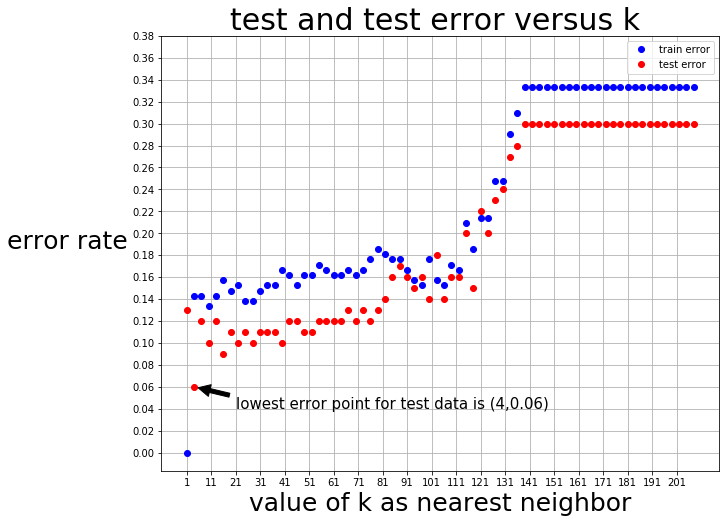

In [24]:
k_value = np.arange(1,211,3)
train_error = find_error(k_value, train_set_x, train_set_y,test_set_x,test_set_y)['train_error']
test_error = find_error(k_value, train_set_x, train_set_y,test_set_x,test_set_y)['test_error']
plot_error(k_value,test_error,train_error)

#### According to the graph, k=4 is the most suitable k

In [25]:
neighbor = knneighbor(k_value[np.argmin(test_error)], train_set_x, train_set_y)
predict_y = neighbor.predict(test_set_x)
true_y = test_set_y.values

In [26]:
tn, fp, fn, tp = confusion_matrix(test_set_y.values, neighbor.predict(test_set_x)).ravel()

print('confusion matrix[tn, fp, fn, tp]: ' + '{:^54}'.format(str((tn, fp, fn, tp))))
      
print('True positive rate(recall) is: ' + '{:^65}'.format(str(recall_score(true_y,predict_y))))
      
print('True negative rate(specificity) is: ' + '{:^55}'.format(str((tn/(tn+fp)))))

print('positive predict value(precision) is: ' + '{:^50}'.format(str(precision_score(true_y,predict_y))))

print('F1 score is: ' + '{:^100}'.format(str(f1_score(true_y,predict_y))))

confusion matrix[tn, fp, fn, tp]:                     (25, 5, 1, 69)                    
True positive rate(recall) is:                        0.9857142857142858                        
True negative rate(specificity) is:                   0.8333333333333334                   
positive predict value(precision) is:                 0.9324324324324325                
F1 score is:                                          0.9583333333333333                                         


#### iii. Since the computation time depends on the size of the training set, one may only use a subset of the training set. Plot the best test error rate, which is obtained by some value of k, against the size of training set, when the size of training set is $N \in \{10, 20, 30, . . . , 210\}$. Note: for each N, select your training set by choosing the ﬁrst $\lfloor{N/3}\rfloor$ rows of Class 0 and the ﬁrst $N - \lfloor{N/3}\rfloor$ rows of Class 1 in the training set you creatd in 1(b)iii. Also, for each $N$, select the optimal k from a set starting from $k = 1$, increasing by 5. For example, if $N = 200$, the optimal $k$ is selected from $\{1, 6, 11, . . . , 196\}$. This plot is called a Learning Curve.

In [27]:
n_range = np.arange(10,211,10)
best_error = []
for N in n_range:
    temp_error = []
    for k in np.arange(1,N,5):
        neighbor = Nsizetrainknneighbor(N, k, train_set)
        temp_error.append(1-neighbor.score(test_set_x,test_set_y))
    best_error.append(round(min(temp_error),4))

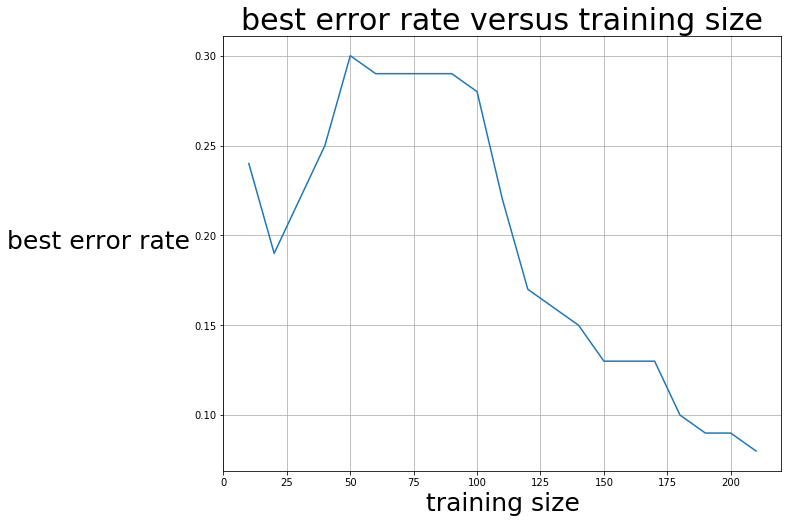

In [28]:
plt.figure(figsize=(10,8))
plt.plot(n_range,best_error,'-')
plt.grid(b="True")
plt.xlabel('training size',fontsize=25)
plt.ylabel('best error rate',fontsize=25, rotation = 'horizontal',horizontalalignment='right')
plt.title("best error rate versus training size",fontsize = 30)
plt.show()

### (d) Replace the Euclidean metric with the following metrics and test them. Summarize the test errors (i.e., when $k = k^*$) in a table. Use all of your training data and select the best $k$ when $\{1, 6, 11, ..., 196\}$.

#### A.	which becomes Manhattan Distance with $p = 1$.

In [29]:
error_summary = []

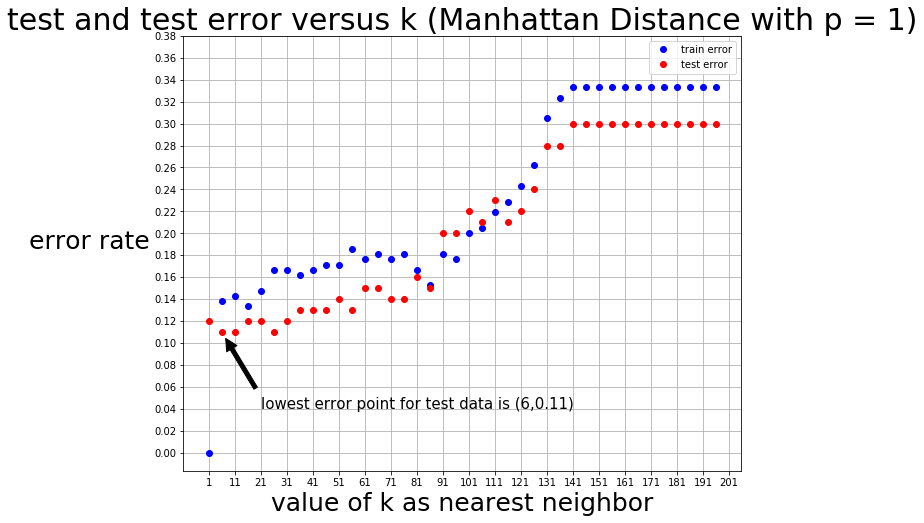

In [30]:
k_value = np.arange(1,197,5)
train_error = find_error(k_value, train_set_x, train_set_y,test_set_x,test_set_y,power=1,metric_para='manhattan')['train_error']
test_error = find_error(k_value, train_set_x, train_set_y,test_set_x,test_set_y,power=1,metric_para='manhattan')['test_error']
plot_error(k_value,test_error,train_error,'(Manhattan Distance with p = 1)')

# error_summary.append([k_value[np.argmin(test_error)],np.min(test_error)])

In [31]:
#geting all lowest error point
min_k = []
for i in range(len(k_value)):
    if(test_error[i]==np.min(test_error)):
        min_k.append(k_value[i])
        error_summary.append(['manhattan',1,k_value[i],round(test_error[i],2)])
print(error_summary)
# print(min_k)

[['manhattan', 1, 6, 0.11], ['manhattan', 1, 11, 0.11], ['manhattan', 1, 26, 0.11]]


#### B.	with $log_{10}(p) \in \{0.1, 0.2, 0.3, ..., 1\}$. In this case, use the $k^*$ you found for the Manhattan distance in 1(d)iA. What is the best $log_{10}(p)$?

In [32]:
error_set = []
for i in np.arange(0.1,1.1,0.1):
    p = 10**i
#     print(p)
    sub_error = []
    for k in min_k:
        neighbor = knneighbor(k,train_set_x,train_set_y,power=p)
        sub_error.append(1-neighbor.score(test_set_x,test_set_y))
    error_set.append(sub_error)

error_df = pd.DataFrame(error_set, columns = ['k=6','k=11','k=26'], index = ['p=10^{0}'.format(round(i,1)) for i in np.arange(0.1,1.1,0.1)])
print(error_df.head(10))
error_summary.append(['Minkowskin','10^0.6',6,round(error_df.loc['p=10^0.6','k=6'],2)])
# print(error_summary)

           k=6  k=11  k=26
p=10^0.1  0.09  0.11  0.10
p=10^0.2  0.09  0.11  0.10
p=10^0.3  0.08  0.12  0.11
p=10^0.4  0.08  0.12  0.10
p=10^0.5  0.08  0.12  0.11
p=10^0.6  0.06  0.12  0.10
p=10^0.7  0.07  0.12  0.11
p=10^0.8  0.08  0.11  0.11
p=10^0.9  0.09  0.11  0.11
p=10^1.0  0.09  0.11  0.11


### We know best $log_{10}(p)$ exist when p = $10^{0.6}$ and k = 6. The error rate is 0.06

#### C.	which becomes Chebyshev Distance with $p \to \infty$

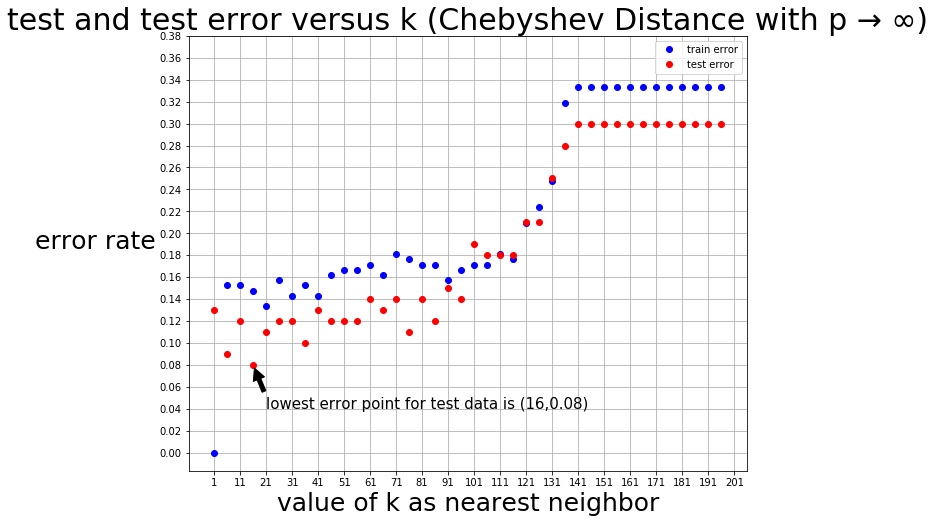

In [33]:
k_value = np.arange(1,197,5)
train_error = find_error(k_value, train_set_x, train_set_y,test_set_x,test_set_y,power=float('inf'),metric_para='chebyshev')['train_error']
test_error = find_error(k_value, train_set_x, train_set_y,test_set_x,test_set_y,power=float('inf'),metric_para='chebyshev')['test_error']
plot_error(k_value,test_error,train_error,'(Chebyshev Distance with p → ∞)')
error_summary.append(['Chebyshev','Inf',k_value[np.argmin(test_error)],np.min(test_error)])

### ii.	Mahalanobis Distance.

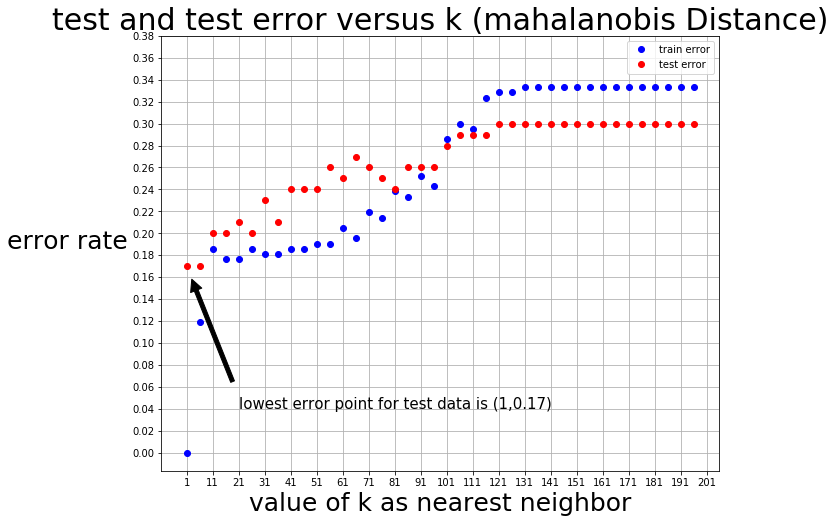

In [34]:
k_value = np.arange(1,197,5)
train_error = find_error(k_value, train_set_x, train_set_y,test_set_x,test_set_y,metric_para='mahalanobis')['train_error']
test_error = find_error(k_value, train_set_x, train_set_y,test_set_x,test_set_y,metric_para='mahalanobis')['test_error']
plot_error(k_value,test_error,train_error,'(mahalanobis Distance)')
error_summary.append(['Mahalanobis','-',k_value[np.argmin(test_error)],np.min(test_error)])

In [35]:
error_table = pd.DataFrame(error_summary,columns = ['Distance',' p', 'Best K', 'Best Error Rate'])
error_table

,Distance,p,Best K,Best Error Rate
0,manhattan,1,6,0.11
1,manhattan,1,11,0.11
2,manhattan,1,26,0.11
3,Minkowskin,10^0.6,6,0.06
4,Chebyshev,Inf,16,0.08
5,Mahalanobis,-,1,0.17


### (e) The majority polling decision can be replaced by weighted decision, in which the weight of each point in voting is inversely proportional to its distance from the query/test data point. In this case, closer neighbors of a query point will have a greater inﬂuence than neighbors which are further away. Use weighted voting with Euclidean, Manhattan, and Chebyshev distances and report the best test errors when $k \in \{1, 6, 11, 16, ..., 196\}$.

In [36]:
weighted_error_summary = []

####  i. Euclidean

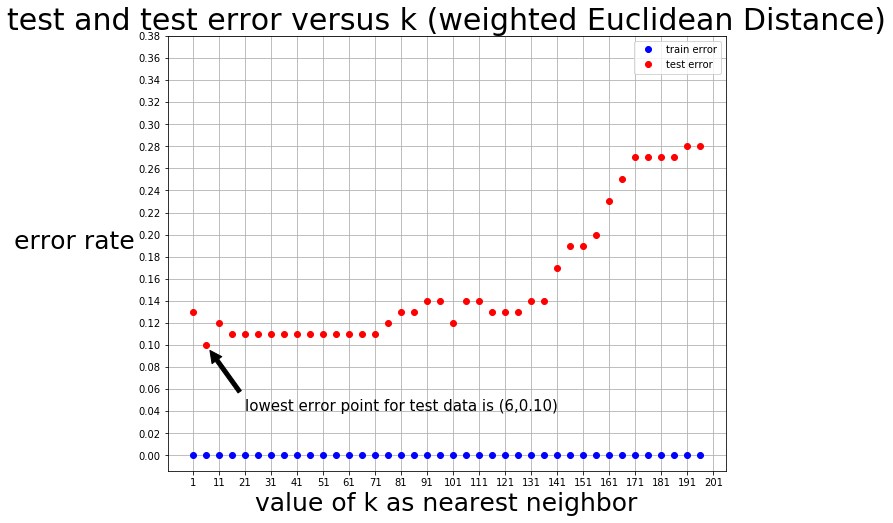

In [37]:
k_value = np.arange(1,197,5)
train_error = find_error(k_value, train_set_x, train_set_y,test_set_x,test_set_y,weight_para='distance')['train_error']
test_error = find_error(k_value, train_set_x, train_set_y,test_set_x,test_set_y,weight_para='distance')['test_error']
plot_error(k_value,test_error,train_error,'(weighted Euclidean Distance)')
weighted_error_summary.append(['Euclidean',2,k_value[np.argmin(test_error)],np.min(test_error)])

#### ii. Manhattan

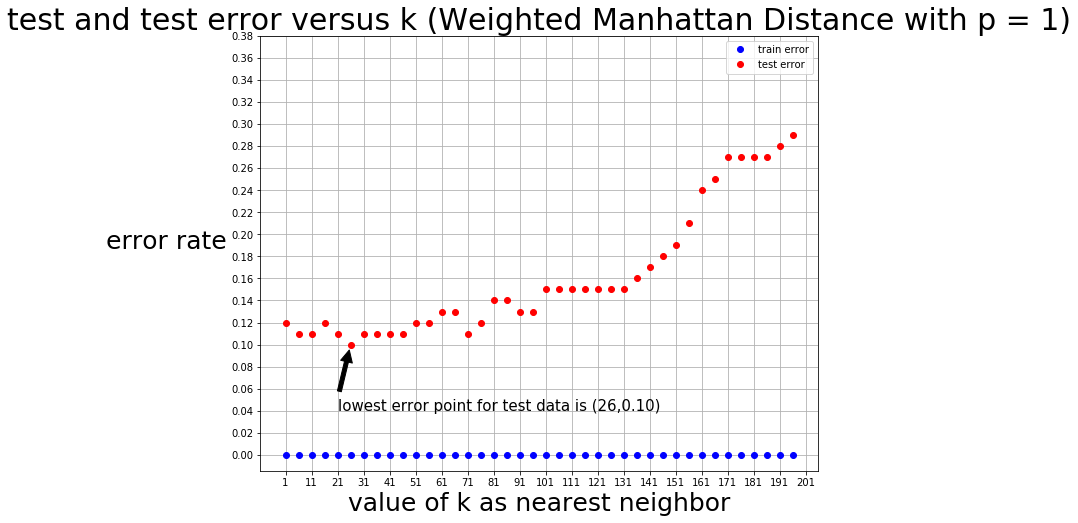

In [38]:
k_value = np.arange(1,197,5)
train_error = find_error(k_value, train_set_x, train_set_y,test_set_x,test_set_y,
                         power=1,metric_para='manhattan',weight_para = 'distance')['train_error']
test_error = find_error(k_value, train_set_x, train_set_y,test_set_x,test_set_y,
                        power=1,metric_para='manhattan',weight_para = 'distance')['test_error']
plot_error(k_value,test_error,train_error,'(Weighted Manhattan Distance with p = 1)')
weighted_error_summary.append(['Manhattan',1,k_value[np.argmin(test_error)],np.min(test_error)])

#### iii. Chebyshev

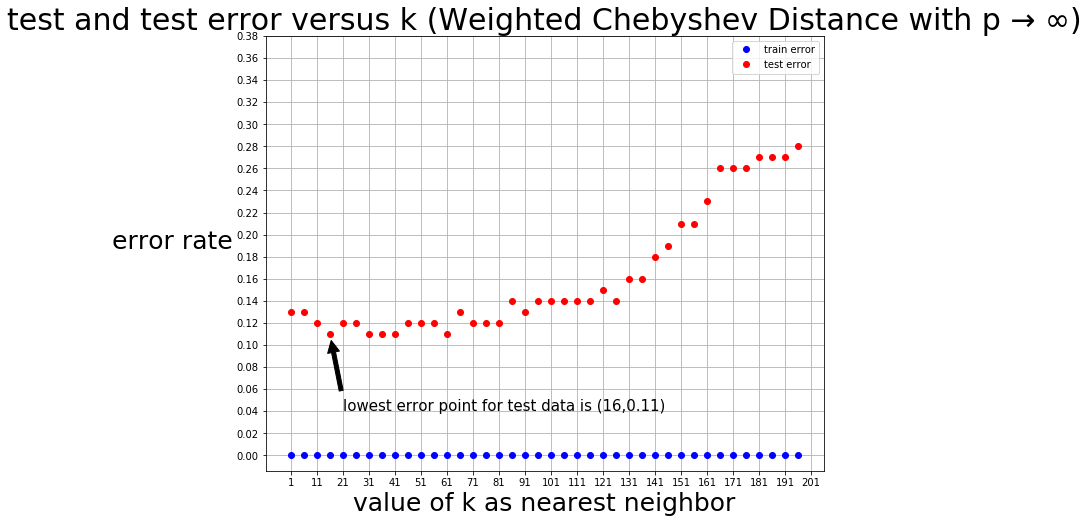

In [39]:
k_value = np.arange(1,197,5)
train_error = find_error(k_value, train_set_x, train_set_y,test_set_x,test_set_y,
                         power=float('inf'),metric_para='chebyshev',weight_para = 'distance')['train_error']
test_error = find_error(k_value, train_set_x, train_set_y,test_set_x,test_set_y,
                        power=float('inf'),metric_para='chebyshev',weight_para = 'distance')['test_error']
plot_error(k_value,test_error,train_error,'(Weighted Chebyshev Distance with p → ∞)')
# weighted_error_summary.append(['Chebyshev','-',k_value[np.argmin(test_error)],np.min(test_error)])

min_error = np.min(test_error)

for i in range(len(k_value)):
    if test_error[i] == min_error:
        weighted_error_summary.append(['Chebyshev','-',k_value[i],min_error])

In [40]:
weighted_error_table = pd.DataFrame(weighted_error_summary
                           ,columns = ['Distance',' p', 'Best K', 'Best Error Rate'])
weighted_error_table

,Distance,p,Best K,Best Error Rate
0,Euclidean,2,6,0.10
1,Manhattan,1,26,0.10
2,Chebyshev,-,16,0.11
3,Chebyshev,-,31,0.11
4,Chebyshev,-,36,0.11
5,Chebyshev,-,41,0.11
6,Chebyshev,-,61,0.11


### (f) What is the lowest training error rate you achieved in this homework?
#### The lowest training error is $0$ when $k = 1$, in which each point's neighbor is itself.